# <<< Only problem 2 and 6 will be graded. >>>

## Problem 1: Simplex method

Solve the following program using the Simplex method by hand :
$$Objective : max(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  3x  - y & \leq 5 \\
  x -  y & \leq  2 \\
  x, y & \geq 0 \\
\end{split}
\end{equation*}


In [1]:
pass

## Problem 2 : Two-phased simplex method

Solve the following program using a two-phased simplex method by hand :

$$Objective : max(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  3x  - y & \geq 0 \\
  x -  y & \leq  2 \\
  x, y & \geq 0 \\
\end{split}
\end{equation*}

In [2]:
pass

## Problem 3 : Unrestricted variable

Solve the following program:
$$Objective : min(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  7x  - y & \geq 2 \\
  x -  2y & \leq  2 \\
\end{split}
\end{equation*}

Find the solution of $x, y$ in a standard form, and explain the behavior of the optimized unrestricted variables.

In [3]:
pass

## Problem 4: Proof

(Winston p.139 problem 6) For an LP in standard form with constraint $A\mathbf{x} = \mathbf{b}$ and $ \mathbf{x} \geq 0$ show that $\mathbf{d}$ is a direction of unboundedness if and only if  $A\mathbf{d} = 0 $ and $\mathbf{d} \geq \mathbf{0}.$

In [4]:
pass

## Problem 5:  Multi-objective linear optimization


Solve the following program :
$$Objective : max(\{3x + 4y,  4z, y + z\}) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y - 4z & \leq 7 \\
  3x  - y + 2z& \geq 2 \\
  x -  y  + 3z & \leq  2 \\
  x, y, z & \geq 0 \\
\end{split}
\end{equation*}


In [5]:
pass

##  Problem 6:  Hamtaro factory (part 2)

After finding the recipe for the Hamtaro snack, he then starts hiring a worker to work for his sweatshop. Initially, he has 50 hamster workers in the factory. However, due to substandard working conditions, 10% of the worker <s >die</s> resign every month. Despite that, Hamtaro does not care about this problem and just hire new workers to fulfill the factory's demand. Before working in the factory, the newly hired hamster has to undergo training for one month to become a skilled worker, of which 40% of the hamsters dropped out before the training finishes as they realize how terrible the Hamtaro factory is. The salary for each hamster worker is 8,000 THB per month, and it cost 500 THB to train each hamster. As Hamtaro predicted the number of required workers each month, how many hamsters should he hire each month to satisfy the factory's demand? Formulate the problem as a linear program and solve for an optimal solution.

|  Month | 1  |  2 |  3 |  4 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Amount of required factory worker | 40 | 60 | 80 | 40 | 100| 90 |

**Note : The optimal solution does not have to be an integer.** </br>




In [6]:
from scipy.optimize import linprog
import numpy as np

In [7]:
# Decision Variable
# Wi = #worker in each month -> has 6 months
# Ni = #new worker in each month -> has 5 months

# Objective: min[8000(W1+W2+W3+W4+W5+W6) + 500(N1+N2+N3+N4+N5)]

# Constraint
# W1 >= 40  → 50 >= 40
# W2 >= 60  → (0.9)*50 + (0.6)*N1 >= 60
# W3 >= 80  → ((0.9)^2)*50 + (0.6)(0.9)*N1 + (0.6)*N2 >= 80
# W4 >= 40  → ((0.9)^3)*50 + (0.6)((0.9)^2)*N1 + (0.6)(0.9)*N2 + (0.6)*N3 >= 40
# W5 >= 100 → ((0.9)^4)*50 + (0.6)((0.9)^3)*N1 + (0.6)((0.9)^2)*N2 + (0.6)(0.9)*N3 + (0.6)*N4>= 100
# W6 >= 90  → ((0.9)^5)*50 + (0.6)((0.9)^4)*N1 + (0.6)((0.9)^3)*N2 + (0.6)((0.9)^2)*N3 + (0.6)(0.9)*N4 + (0.6)*N5 >= 90

# Objective: 1874236 + min[(20156.48*N1) + (17007.2*N2) + (13508*N3) + (9620*N4) + (5300*N5)]

# Standard Form
# 0.6*N1 - e1 = 15
# 0.54*N1 + 0.6 - e2 = 39.5
# 0.486*N1 + 0.54*N2 + 0.6*N3 - e3 = 3.55
# 0.4374*N1 + 0.486*N2 + 0.54*N3 + 0.6*N4 - e4 = 67.195
# 0.39366*N1 + 0.4374*N2 0.486*N3 + 0.54*N4 + 0.6*N5 - e5 = 60.4755

# Ni, ei >= 0

In [8]:
c_T = np.array([20156.48, 17007.2, 13508, 9620, 5300, 0, 0, 0, 0, 0])

In [9]:
b = np.array([15, 39.5, 3.55, 67.195, 60.4755])

In [10]:
A = np.array([
    [0.6, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # 0.6 * N1 - e1 = 15
    [0.54, 0.6, 0, 0, 0, 0, -1, 0, 0, 0],  # 0.54 * N1 + 0.6 * N2 - e2 = 39.5
    [0.486, 0.54, 0.6, 0, 0, 0, 0, -1, 0, 0],  # 0.486 * N1 + 0.54 * N2 + 0.6 * N3 - e3 = 3.55
    [0.4374, 0.486, 0.54, 0.6, 0, 0, 0, 0, -1, 0],  # 0.4374 * N1 + 0.486 * N2 + 0.54 * N3 + 0.6 * N4 - e4 = 67.195
    [0.39366, 0.4374, 0.486, 0.54, 0.6, 0, 0, 0, 0, -1]  # 0.39366 * N1 + 0.4374 * N2 + 0.486 * N3 + 0.54 * N4 + 0.6 * N5 - e5 = 60.4755
])

In [11]:
bounds = [(0,None)]*10

In [12]:
result = linprog(c=c_T, b_eq=b, A_eq=A, bounds=bounds, method='simplex')

<ipython-input-12-7754f7b71cc4>:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c=c_T, b_eq=b, A_eq=A, bounds=bounds, method='simplex')


In [13]:
total_cost = 1874236 + result.fun
print(f"Total Minimized Cost: {total_cost:.2f} THB\n")

for i in range(5):
    new_workers = result.x[i]
    print(f"Month {i + 1}: New Workers Hired = {new_workers:.2f}")

total_new_workers = sum(result.x[:5])
print(f"\nTotal New Workers Hired: {total_new_workers:.2f} workers")

Total Minimized Cost: 3679500.00 THB

Month 1: New Workers Hired = 25.00
Month 2: New Workers Hired = 43.33
Month 3: New Workers Hired = 0.00
Month 4: New Workers Hired = 58.67
Month 5: New Workers Hired = 0.00

Total New Workers Hired: 127.00 workers


## Problem 7: $l_1$ regression

There are some special non-linear problems that could be transformed into a linear program. Absolute value is on one of them.


Assuming that $  \forall j, c_j >0 $, the program
$$Objective : min(c_1|x_1| + c_2|x_2| + ... + c_n|x_n|) $$

\begin{equation*}
s.t.
\begin{split}
  a_{i,1}x_1 +  a_{i,2}x_2 + ...  a_{i,m}x_n & \geq b \space\space\space\space for \space\space i = 1, 2, ..., m\\
\end{split}
\end{equation*}

could be transformed into a linear program. To transform the program above, we write :

$$ x_j = x^+_j - x^-_j $$

and replace $|x_j|$ into $ x^+_j + x^-_j $ then add $ x^+_j,  x^-_j \geq 0.$ Therefore, the linear program for the problem is :

$$Objective : min(c_1(x_1^+ + x_1^-) + c_2(x_2^+ + x_2^-) + ... + c_n(x_n^+ + x_n^-)) $$

\begin{equation*}
s.t.
\begin{split}
  a_{i,1}(x_1^+ - x_1^-) +  a_{i,2}(x_2^+ - x_2^-) + ...  a_{i,m}(x_n^+ - x_n^-) & \geq b\\
  \forall j, \space x_j^+, x_j^- & \geq 0
\end{split}
\end{equation*}

Being able to solve a linear program for absolute values allow us to solve new problems, of which one of them is a $l_1$ regression.



#### Consider the following datapoints :

In [14]:
import numpy as np
x = np.array([0.1, -1  , -0.4,  2.3, 1.1, 3.2, 1, 4.1, -1.2, 0.9, 5, 0, 7])
y = np.array([2   , 1.2, 0.7  , 4   , 3   , 5   , 2, 3   , 0   , 25  , 6, 1,6])

As you have already learned in COM ENG MATH I class, we could find a line that best fit these datapoints by using the least square method, which could be written in a mathematical program shown below :

####Decision variable $\beta_1, \beta_0$


$$Objective : min( \sum_{i=1}^{N}(y_i - (\beta_1x_i + \beta_0))^2) $$
\begin{equation*}
s.t.
\begin{split}
  \beta_1, \beta_0 \in R
\end{split}
\end{equation*}



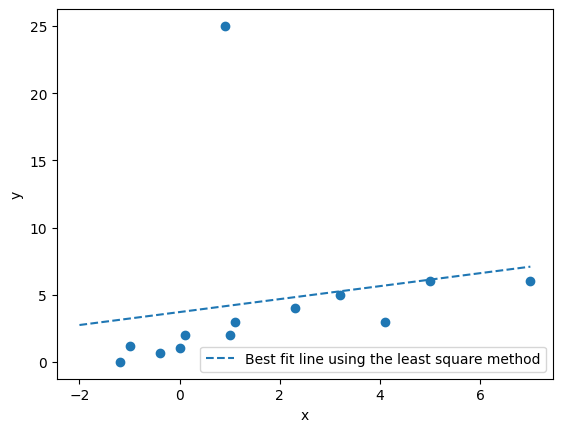

In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
beta_1, beta_0 = (reg.coef_)[0,0], reg.intercept_[0]

x_pred = np.linspace(-2, 7, 100)
y_pred = beta_1 * x_pred + beta_0
plt.plot(x_pred, y_pred, '--', label = 'Best fit line using the least square method')
plt.scatter(x, y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From the result above, by using the least square method, the line is not properly fit when the outliers are in the data. Therefore, in this situation, $l_1$ regression is often used as an alternative.

A mathematical program for $l_1$ regression is:

####Decision variable $\beta_1, \beta_0$

$$Objective : min( \sum_{i=1}^{N}|y_i - (\beta_1x_i + \beta_0)|) $$
\begin{equation*}
s.t.
\begin{split}
  \beta_1, \beta_0 \in R
\end{split}
\end{equation*}



Find $\beta_1, \beta_0$ using $l_1$ regression by reformulating the problem as a linear program,  and compare the result with the least square method by plotting the line generated $l_1$ regression. Which one is better, and why?

**WARNING : Be careful.** </br>


In [16]:
pass

# Problem 8: Duality Theorem

Corresponding to a given **primal form** linear programming problem

$$Objective : max( c^Tx) $$
\begin{equation*}
s.t.
\begin{split}
  Ax \leq b \\
  x \geq 0
\end{split}
\end{equation*}

there is another problem called **dual form** as follow:

$$Objective : min( b^Ty) $$
\begin{equation*}
s.t.
\begin{split}
  A^Ty & \geq c \\
  y & \geq 0 \\
\end{split}
\end{equation*}

The **strong duality theorem** says that the objective of the two LPs will be equal.

In this problem we will use this property to convert between forms and show the potential usefulness of duality.

## 8.1

Solve the following primal form LP :

$$Objective : min(3x_1 - 2x_2 + 4x_3) $$
\begin{equation*}
s.t.
\begin{split}
  -2x_1 + 5x_2 - 4x_3& \leq -7 \\
  -6x_1 - x_2 + 3x_3& \leq -4 \\
  7x_1 + 2x_2 + x_3& \leq 10 \\
  1x_1 - 2x_2 - 5x_3& \leq -3 \\
  -2x_1 + 7x_2 - 2x_3& \leq -2 \\
  x_1, x_2, x_3& \geq 0 \\
\end{split}
\end{equation*}



# 8.2

Compare the primal and dual form, which one take more iterations to solve? What might have caused this? Discuss the potential advantages of this technique in real world problems.

Ans:

# 8.3 Proving **weak duality theorem**

The weak duality theorem states that the dual will be an upper-bound of the primal. In other words,

If $x \in R^n$ is a feasible solution (not necessary optimal) for the primal and $y \in R^m$ is a feasible solution for the dual, then

$$ c^Tx \leq b^Ty$$

Prove the weak duality theorem

(Hint: if x and y are feasible solutions, the constrains must be true)

In [17]:
pass

## Additional info about Duality (optional)

The strong duality can be shown from the weak duality if we use the simplex method or can be proved using Farkas's Lemma. See TA's solution for the proof of the strong duality theorem.

For LPs, the strong duality always hold. For general optimization problems, only weak duality applies.

The duality theorem provides another way to look into a particular problem and can be a powerful tool for problem interpretation.

Let's consider a very trivial problem to illustrate this.

**Primal problem (max)**

A tree can be used to produce 3 chairs or 2 tables. A chair sells for 30. A table sells for 40. Find the optimal revenue for a carpenter using this tree.

Let $c$ and $t$ be the amount of chairs and tables to produce, respectively. \\

$$Objective : max(30c + 40t) $$
\begin{equation*}
s.t.
\begin{split}
\frac{1}{3}c + \frac{1}{2}t \leq 1 \\
c,t \geq 0
\end{split}
\end{equation*}

**Dual problem (min)**

A business man wants to buy the tree from the carpenter. Find the optimal price for the businessman. In this case, the constraint dictates that the price should be high enough for the carpenter to sell if he were to fully make the tree into a chair or a table.

Let $p$ be the price of a tree that the businessman should pay for. \\

$$Objective : min(1p) $$
\begin{equation*}
s.t.
\begin{split}
\frac{1}{3}p\geq 30 \\
\frac{1}{2}p\geq 40 \\
p \geq 0
\end{split}
\end{equation*}

The conversion between Primal and Dual provided here is very specific. However, there is a more generic way to convert between the two forms which make it applicable to more types of problems. For more details on duality see Chapter 6 in the book.

In [18]:
pass